In [1]:
import numpy as np
import pandas as pd
from openbb import obb

Extensions to add: alpha_vantage@1.4.1, biztoc@1.4.2, cboe@1.4.1, deribit@1.0.1, ecb@1.4.2, econometrics@1.5.3, finra@1.4.1, finviz@1.3.1, government_us@1.4.1, multpl@1.1.1, nasdaq@1.4.1, openbb_charting@2.3.4, quantitative@1.4.3, seeking_alpha@1.4.1, stockgrid@1.4.1, technical@1.4.3, tmx@1.3.2, tradier@1.3.1, wsj@1.4.1, yfinance@1.4.6
Extensions to remove: yfinance@1.4.3

Building...


In [2]:
obb.user.preferences.output_type = "dataframe"

In [3]:
data = obb.derivatives.futures.curve(symbol = "VX")

In [4]:
print(data)

  expiration  price
0    2025-05  18.80
1    2025-06  19.75
2    2025-07  20.15
3    2025-08  20.35
4    2025-09  20.55
5    2025-10  20.65
6    2025-11  20.65
7    2025-12  20.45
8    2026-01  20.75


In [5]:
import numpy as np
print(np.__version__)

2.2.5


c:\Users\Jorda\anaconda3\envs\my-other-quant-stack\lib\site-packages\numpy\__init__.py


<Axes: xlabel='expiration'>

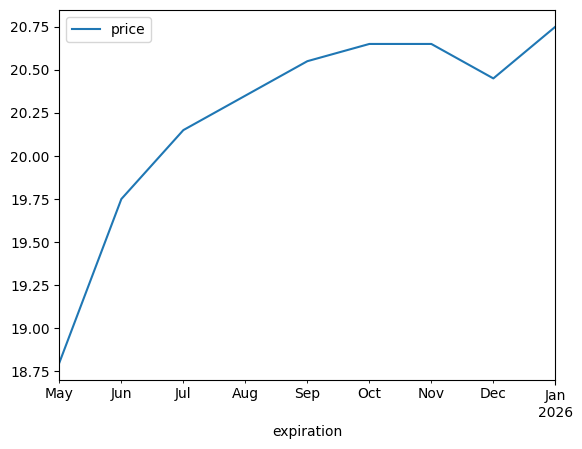

In [6]:
print(np.__file__)
data.index = pd.to_datetime(data.expiration)
data.plot()
# print(np.__file__)

List of Expiration years and dates in string format

In [13]:
expirations = [
    "2024-12",
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

In [17]:
contracts = []
for expiration in expirations:
    df = (
        obb
        .derivatives
        .futures
        .historical (
            symbol="SOL_USDC-PERPETUAL",
            expiration = expiration,
            start_date = "2020-01-01",
            end_date = "2022-12-31"
        )
    ).rename(columns = {
        "close": expiration
    })

    contracts.append(df[expiration])

In [18]:
historical = (
    pd.DataFrame(contracts)
    .transpose()
    .dropna()
)
print(historical)

                           2024-12  2025-12  2026-12  2027-12  2028-12  \
date                                                                     
2022-03-15 08:00:00+00:00    82.50    82.50    82.50    82.50    82.50   
2022-03-16 08:00:00+00:00    87.16    87.16    87.16    87.16    87.16   
2022-03-17 08:00:00+00:00    85.77    85.77    85.77    85.77    85.77   
2022-03-18 08:00:00+00:00    89.41    89.41    89.41    89.41    89.41   
2022-03-19 08:00:00+00:00    91.04    91.04    91.04    91.04    91.04   
...                            ...      ...      ...      ...      ...   
2022-12-25 08:00:00+00:00    11.30    11.30    11.30    11.30    11.30   
2022-12-26 08:00:00+00:00    11.20    11.20    11.20    11.20    11.20   
2022-12-27 08:00:00+00:00    10.13    10.13    10.13    10.13    10.13   
2022-12-28 08:00:00+00:00     9.60     9.60     9.60     9.60     9.60   
2022-12-29 08:00:00+00:00     9.12     9.12     9.12     9.12     9.12   

                           2029-12  2